<div align="center">

<img src="../logo_isel.png" alt="ISEL" width="400"/>

<br><br>

**Instituto Superior de Engenharia de Lisboa**  
Licenciatura em Engenharia Informática e Multimédia  

<br><br>

### <u>Processamento de Imagem e Visão (PIV)</u>  
**Semestre de Inverno 25/26**

<br>

## 1º Trabalho Prático
**Contagem e Classificação de Peças LEGO**

<br><br><br>

<div align="left">

**Trabalho realizado por:**  
Miguel Cordeiro — nº 40765 — LEIM51N Grupo x  
Bruno Santos — nº 45096 — LEIM51N Grupo x  

**Docente:** Eng.º x 

</div>

</div>


### 1. Introdução

<div style="text-align: justify">
Neste trabalho, pretende-se desenvolver um algoritmo que seja capaz de contar um conjunto de ***peças de lego retangulares*** que foram colocadas em cima de uma mesa. Esta contagem não pode ser feita através da cor e o algoritmo é desenvolvido através da biblioteca de funções *OpenCV*, uma biblioteca usada na programação de aplicações de visão em tempo real para a linguagem de programação ***Python***.

Este algoritmo conta as peças com base nas suas dimensões. As dimensões a serem consideradas são ***2x2***, ***2x4***, ***2x6*** e ***2x8***. Qualquer outra peça que não se enquadre nestes formatos ou cujo o formato não seja perceptivel mesmo após o processamento das imagens e aplicação do algoritmo será considerada como ***Indefinido***.

Além da contagem de peças, o algoritmo irá tratar devidamente algumas perturbações que possam alterar as contagens, nomeadamente sombras, outras peças de lego no campo de visão e o contacto entre peças de lego.

**Conceitos Teóricos**

> Limiar Local: O limiar local é o valor de corte calculado para cada zona da imagem, em vez de um único valor global.

</div>

    - Bibliotecas Importadas

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### 2. Leitura de Imagens

(525, 706, 3)
(525, 706)


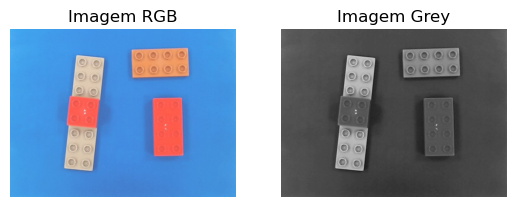

In [17]:
# Variavel de path [MUDAR PATH PARA TESTAR COM OUTRA IMAGEM]
path_img = "../images/lego11.jpg"

# Ler imagens
img = cv2.imread(path_img)



# Converter para RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Passar Imagem para Tons de Cinzento
img_gray = cv2.imread(path_img, cv2.IMREAD_GRAYSCALE)

# Canais de cores = 3
print(np.shape(img))

# Mostrar imagem RGB
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Imagem RGB")
plt.axis("off")

print(np.shape(img_gray))

# Mostrar imagem Grey
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap="gray")
plt.title("Imagem Grey")
plt.axis("off")
plt.show()

### 3. Binarização

A Binarização é um processo no qual se transforma uma imagem colorida ou em tons de cinza numa imagem binária, isto é, uma imagem representada apenas por duas cores: Preto e Branco.

Este processo envolve a aplicação de um threshold, que determina os pixeis da imagem original serão convertidos para pretos e os que são convertidos para branco.

Um caso particular sobre os tipos de métodos de Binarização é a Binarização Adaptativa, que foi o método adotado neste trabalho. Este método é especialmente útil em imagens com iluminação não uniforme porque permite preservar os detalhes em áreas com os mais variados contrastes.

Uma das vantagens da Binarização é a redução da complexidade dos dados. Ao converter uma imagem em formato binário, os algoritmos de análise e processamento podem operar de forma mais eficiente, isto enquanto poupa tempo e recursos computacionais.

Começamos por criar um Histograma de Imagens para conseguirmos achar o melhor valor possivel para usar como threshold.

Um Histograma de Imagens é uma representação gráfica que mostra a distribuição de intensidades dos pixeis de uma imagem. Esta representação gráfica é fundamental na análise de uma imagem pois permite visualizar o número de pixeis por nível de brilho, do mais escuro para o mais claro. Analisar o Histograma vai ajudar a definir um valor apropriado para usar como threshold.

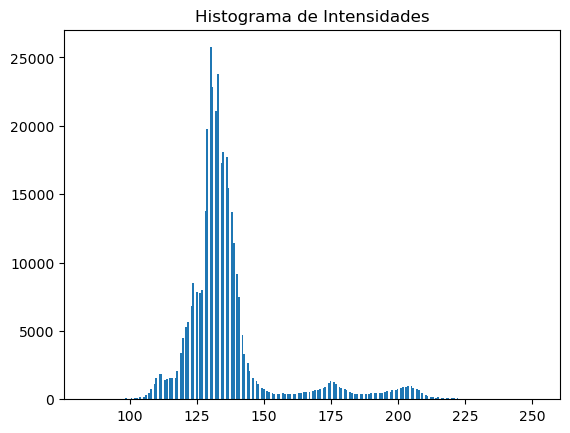

In [18]:
# Analisar o Histograma de Intensidades para calcular o melhor valor de THRESHHOLD
plt.hist(img_gray.ravel(), bins=256)
plt.title("Histograma de Intensidades")
plt.show()

Usamos um filtro GaussianBlur para reduzir o ruido [TO:DO]

In [19]:
# Suavizar ligeiramente para reduzir ruído
img_blur = cv2.GaussianBlur(img_gray, (5,5), 0)

Para binarização precisavamos usar um Threshold para converter a imagem (cinzento com o filtro Gaussian aplicado) em uma imagem binária.

Em vez de um Threshold Simples (dado em aula), optamos por usar um threshold adaptativo porque embora todas as imagens terem um background de uma so cor definida este adapta-se melhor a variações de luz local e lida bem com sombras.

Parametros:
- blockSize: Tamanho da vizinhança.
    - Testamos vários valores para o tamanho da vizinhança para conseguirmos obter o melhor resultado de binarização, embora sempre valores impares (com objetivo de existir sempre um centro para o pixel a ser analisado).
- C: Ajusta a agressividade do filtro.



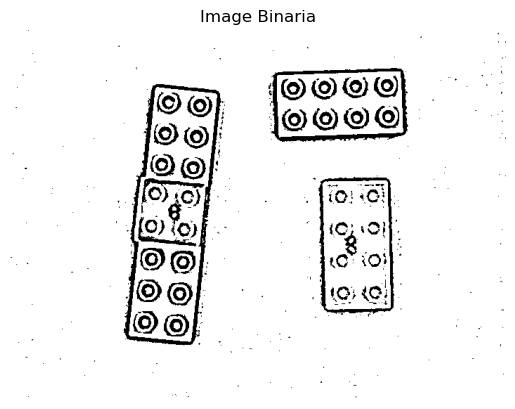

In [31]:
# Threshold adaptativo
blockSize = 15 # blockSize: tamanho da vizinhança (impar)
C = 2 # agressividade do filtro
m3 = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize, C)

# Mostrar imagem
plt.imshow(m3, cmap="gray")
plt.title("Image Binaria")
plt.axis("off")  # Remove os eixos
plt.show()

FONTES:

https://kfcdicasdigital.com/glossario/o-que-e-binarizacao-de-imagem/

https://clubedogis.com.br/glossario/o-que-e-histogramas-de-imagens-guia-completo/